In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from analyze_feature import analyze_feature

In [2]:
# Setting the style for the plots
sns.set_style("white", {'axes.grid' : False})

In [3]:
# Directory where the plots and PDF file will be saved
save_dir_path = 'output'

In [4]:
# Creating a random DataFrame

num_rows = 50

df = pd.DataFrame({
    'feature_1': np.random.randint(30, 101, size=num_rows),
    'feature_2': np.random.randint(30, 101, size=num_rows)
})

df = df.sort_values(by='feature_1', ascending=False).reset_index(drop=True)

max_os_pfs = 40
df['os_months'] = np.linspace(max_os_pfs, 0, num_rows) + np.random.uniform(0, 40, size=num_rows)
df['pfs_months'] = np.linspace(max_os_pfs, 0, num_rows) + np.random.uniform(0, 40, size=num_rows)
df['os_event'] = df['os_months'].apply(lambda x: int(x < max_os_pfs))
df['pfs_event'] = df['pfs_months'].apply(lambda x: int(x < max_os_pfs))

# outcome = 3 years PFS landmark
pfs_landmark = 36 
df['outcome'] = df.apply(lambda x: np.nan if (x['pfs_months'] < pfs_landmark and x['pfs_event'] == 0) else x['pfs_months'], axis=1)
df['outcome'] = df['pfs_months'].apply(lambda x: x > pfs_landmark if pd.notna(x) else np.nan)

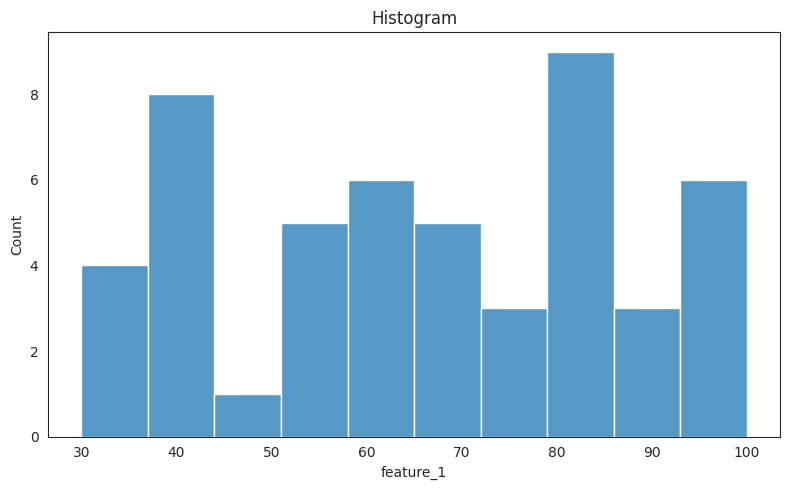

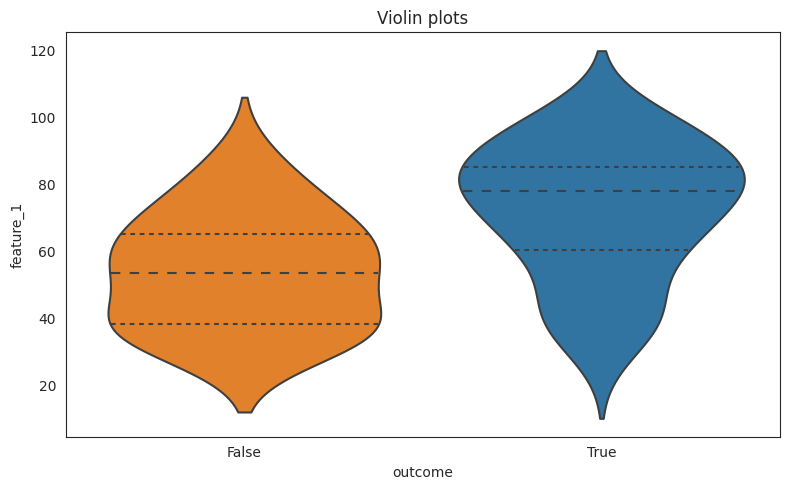

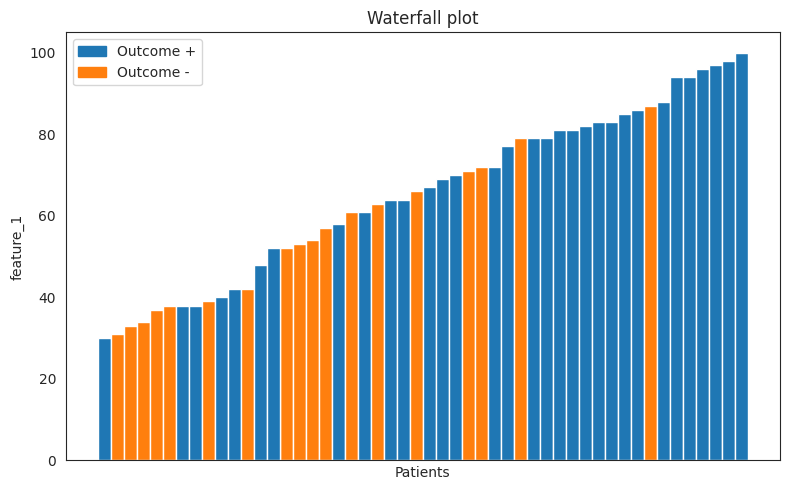

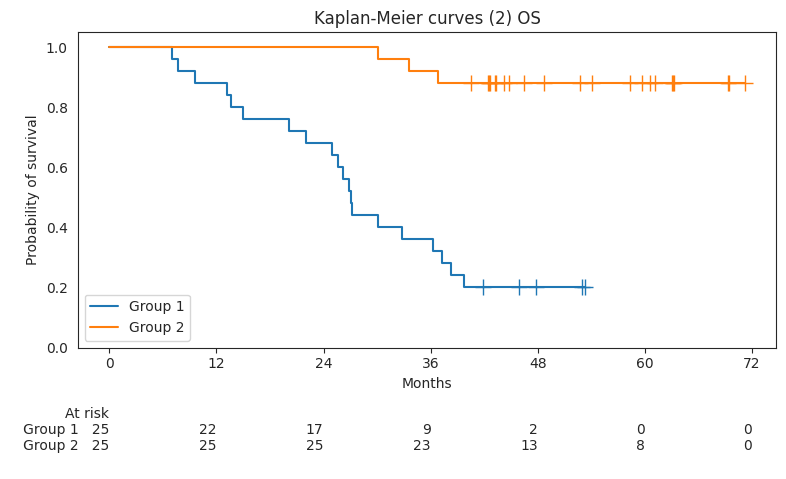

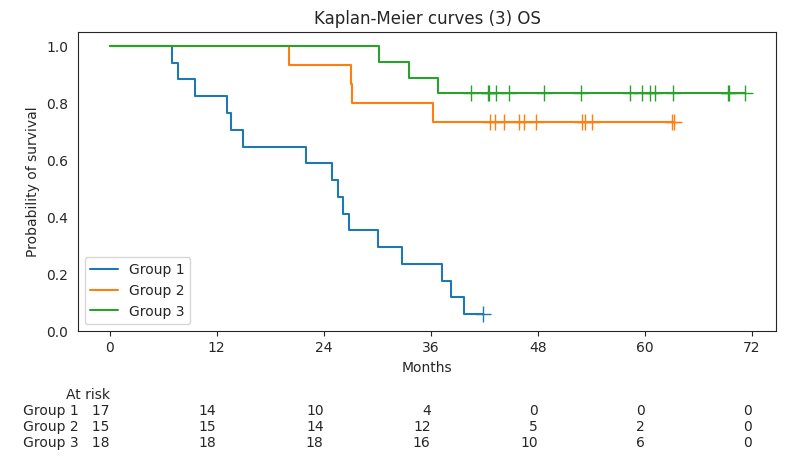

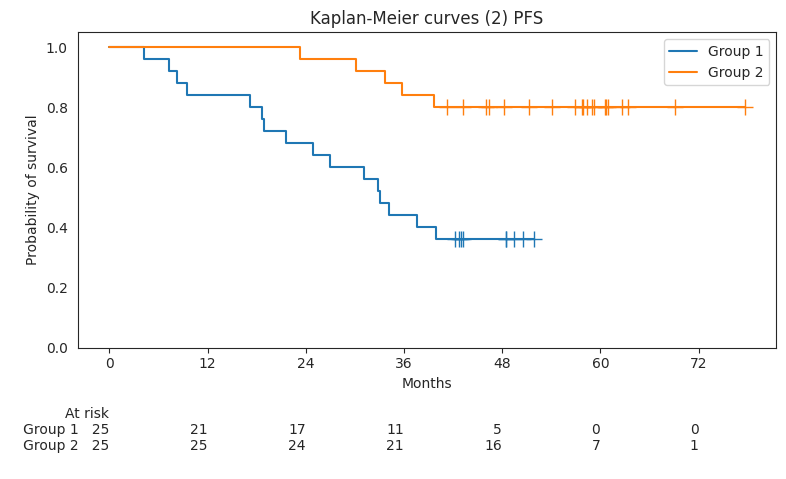

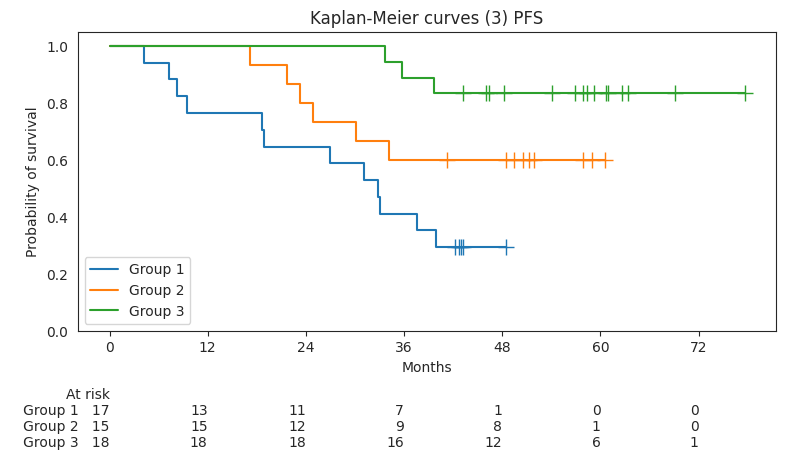

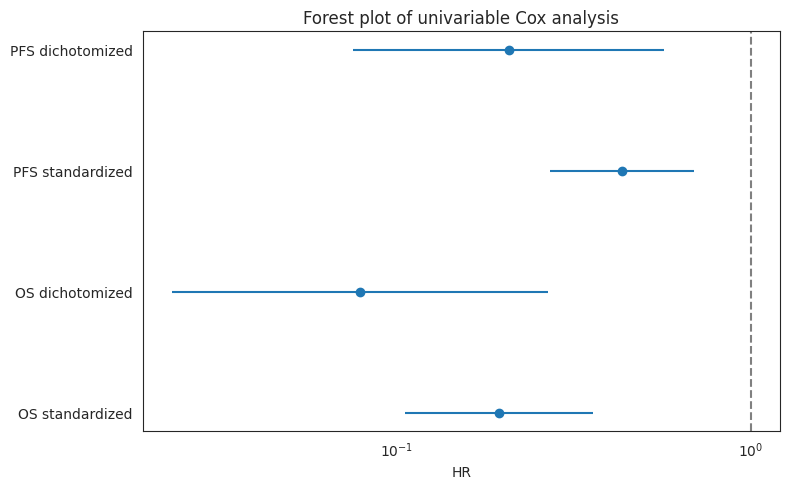

{'Mann-Whitney p-value': 0.002860794079505239, 'Logrank OS p-value': 2.433519804565564e-07, 'Logrank PFS p-value': 0.0007313900704447587, 'Cox OS p-value': 1.378531139264565e-07, 'Cox OS HR': 0.19410084881322667, 'Cox OS assumption p-value': 0.4130980025979387, 'Cox PFS p-value': 0.00047184593792147457, 'Cox PFS HR': 0.4328027151993201, 'Cox PFS assumption p-value': 0.09348210001814809, 'Cox OS dichotomized p-value': 4.614509457300697e-05, 'Cox OS dichotomized HR': 0.0787220710650058, 'Cox OS dichotomized assumption p-value': 0.2788347596431542, 'Cox PFS dichotomized p-value': 0.0022014397900008806, 'Cox PFS dichotomized HR': 0.20697499752512497, 'Cox PFS dichotomized assumption p-value': 0.20425191338992543, 'Logistic regression LOOCV AUC': 0.7361111111111112}

 PDF saved in output/feature_1.pdf


In [5]:
analyze_feature(df, 'feature_1', save_dir_path, scaling_method='standardize', outcome='outcome')